# Data Mining & Analysis


Importing request to handle JSON request and response

In [ ]:
import requests

Defining API key for data access from API

In [ ]:
# Our NASA API key
NASA_API_KEY = 'tII1bhaOPEq00FVxyqtLwv10gBtxeX3i5B7wT9cS'

Function to get ProjectID's from NASA API
and displaying the status for the API Request

In [ ]:
def get_nasa_techport_projectid(api_key):
    url = 'https://techport.nasa.gov/api/projects'
    params = {'api_key': api_key}

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an exception for 4xx/5xx status codes
        data = response.json()
        if response.status_code == 200:
            print(f'Data Retrived Successfully')
            print(data)
            print(type(data)) # response data will be retrived in dictionary form
            # print('Number of records retrieved:', len(data)) #two columns
            return data
        else:
            print('Failed to retrieve data from NASA TechPort API.')
    except requests.exceptions.RequestException as e:
        print('Error fetching data:', e)
        return None

In [ ]:
# retrieving project ids
techport_data = get_nasa_techport_projectid(NASA_API_KEY)

Creating Dataframe of ProjectIDs

In [ ]:
import pandas as pd

# Converting response data to Dataframe
df_project_lst = pd.DataFrame(techport_data)
df_project_lst.head()

,projects,totalCount
0,"{'acronym': '', 'projectId': 116277, 'title': ...",18437
1,"{'acronym': '', 'projectId': 154531, 'title': ...",18437
2,"{'acronym': '', 'projectId': 154382, 'title': ...",18437
3,"{'acronym': '', 'projectId': 94884, 'title': '...",18437
4,"{'acronym': '', 'projectId': 147003, 'title': ...",18437


In [ ]:
# Here, we are dropping 'totalcount' column from the dataset.
df_project_lst = df_project_lst.drop(columns=['totalCount'],axis=1) # axis=1 i.e. dropping column.

In [ ]:
df_project_lst.columns

Index(['projects'], dtype='object')

In [ ]:
# Making a deep copy of dataframe
df_project_lst_copy = df_project_lst.copy(deep=True)
df_project_lst = pd.DataFrame(df_project_lst.projects.tolist(), index= df_project_lst.index)

In [ ]:
df_project_lst.head()

,acronym,projectId,title,website,lastUpdated
0,,116277,,,2024-3-28
1,,154531,,,2024-3-26
2,,154382,,,2024-3-26
3,,94884,,,2024-3-25
4,,147003,,,2024-3-25


In [ ]:
df_project_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18437 entries, 0 to 18436
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   acronym      18437 non-null  object
 1   projectId    18437 non-null  int64 
 2   title        18437 non-null  object
 3   website      18437 non-null  object
 4   lastUpdated  18437 non-null  object
dtypes: int64(1), object(4)
memory usage: 720.3+ KB


here, we have just extracted project ID, because using that value we can fetch other values using it sub-API url.
https://techport.nasa.gov/api/projects/{projectID}

In [ ]:
# making a list of Project IDs
project_id_lst = df_project_lst['projectId'].values.tolist()

In [ ]:
# # Displaying the Project IDs
# print('list of Project IDs are')
# print(project_id_lst)

Function to get Project Data from the NASA sub API using Project IDs fetched in previous steps

In [ ]:
def get_nasa_techport_project_data(api_key, projectId):
    url = f'https://techport.nasa.gov/api/projects/{projectId}'
    params = {'api_key': api_key}

    try:
        response_pID = requests.get(url, params=params)
        response_pID.raise_for_status()  # Raise an exception for 4xx/5xx status codes
        data_pID = response_pID.json()
        # print(f'Response Code is',response_pID.status_code)
        # print('Number of records retrieved:', len(data_pID))
        return data_pID
    except requests.exceptions.RequestException as e:
        print('Error fetching data:', e)
        return None

In [ ]:
# Retreiving all the project id's from the project api (https://techport.nasa.gov/api/projects)
projectIds = [rec['projectId'] for rec in techport_data['projects']]
print('Total:',len(projectIds),'project IDs retreived successfully.')

Total: 18437 project IDs retreived successfully.


Getting appropriate data from the response data and transforming to the data frame.

In [ ]:
# retrieving all coinvestigators invloved in that project
def coinvestigators(record):
    if record is not None:
        return [r['fullName'] for r in record]
    else:
        return None

# retrieving all destinations invloved in that project
def destinations(record):
    if record is not None:
        return [r['description'] for r in record]
    else:
        return None

# retrieving lead organization involved in projects
def lead_Organization(record):
    if record is not None:
        if record['country']['name'] is not None:
            country = record['country']['name']
        orgName = record['organizationName']
        orgType = record['organizationType']
        return {'leadOrg_country': country, 'leadOrg_organizationName': orgName, 'leadOrg_organizationType': orgType}
    else:
        return None

# retrieving all principalInvestigators invloved in that project
def principalInvestigators(record):
    if record is not None:
        return [r['fullName'] for r in record]
    else:
        return None

# retrieving value of sub feature of program feature named active
def program(record):
    return record['active'] if record['active'] is not None else None

# retrieving all progDirectors invloved in that project
def progDirectors(record):
    if record is not None:
        return [r['fullName'] for r in record]
    else:
        return None

# retrieving all programManagers invloved in that project
def programManagers(record):
    if record is not None:
        return [r['fullName'] for r in record]
    else:
        return None

# retrieving value of all (states,country) value (type 'tuple') involved in the project
def statesWithWork(record):
    if record is not None:
        for r in record:
            if r['country']['name'] != '':
                return (r['name'],r['country']['name'])
            else:
                return None
        # return [(r['name'], r['country']['name']) for r in record]
    else:
        return None

# when we don't have value for that partircular record, we have assigned 'None' value, so that system don't encounters error.

In [ ]:
cols = ['additionalTaxonomyNodes', 'coInvestigators', 'currentTrl', 'destinations',  \
        'endYear', 'endTrl', 'endMonth', 'program', 'principalInvestigators', 'leadOrganization', \
        'lastUpdated', 'releaseStatusString', 'projectId', 'programManagers', 'programDirectors', \
        'statusDescription', 'statesWithWork', 'startYear', 'startTrl', 'startMonth', 'viewCount', \
        'title', 'supportingOrganizations']

Retriving the 100 Project's data from NASA Techport API
using the Project IDs  

In [ ]:
from collections import defaultdict # doubt
data = defaultdict(list)

# iterating through 100 of the project ID's
for projectId in projectIds[:100]:

    json_data = get_nasa_techport_project_data(NASA_API_KEY, projectId)

    record = json_data['project']

    projectData = {key: value for key, value in record.items() if key in cols}

    data['taxo_count'].append(len(projectData['additionalTaxonomyNodes']) if projectData.get('additionalTaxonomyNodes') else 0) #len
    data['co_invest'].append(coinvestigators(projectData.get('coInvestigators'))) #list
    data['curr_trial'].append(projectData['currentTrl'] if projectData.get('currentTrl') else None)
    data['dests'].append(destinations(projectData.get('destinations'))) #list
    data['e_month'].append(projectData['endMonth'] if projectData.get('endMonth') else None)
    data['e_year'].append(projectData['endYear'] if projectData.get('endYear') else None)
    data['e_trial'].append(projectData['endTrl'] if projectData.get('endTrl') else None)
    data['l_updated'].append(projectData['lastUpdated'] if projectData.get('lastUpdated') else None)

    leadOrgdict = lead_Organization(projectData.get('leadOrganization'))
    # print(leadOrgdict)
    if leadOrgdict is not None:
        for key, value in leadOrgdict.items():
            data[key].append(value)
    else:
        for key in ['leadOrg_country', 'leadOrg_organizationName', 'leadOrg_organizationType']:
            data[key].append(None)

    data['prin_invest'].append(principalInvestigators(projectData.get('principalInvestigators'))) #list
    data['prog'].append(program(projectData.get('program'))) #value
    data['prog_directors'].append(progDirectors(projectData.get('programDirectors'))) #list
    data['prog_managers'].append(programManagers(projectData.get('programManagers'))) #list

    data['proj_id'].append(projectData['projectId'] if projectData.get('projectId') else None)
    data['release_string'].append(projectData['releaseStatusString'] if projectData.get('releaseStatusString') else None)
    data['strt_month'].append(projectData['startMonth'] if projectData.get('startMonth') else None)
    data['str_trial'].append(projectData['startTrl'] if projectData.get('startTrl') else None)
    data['str_year'].append(projectData['startYear'] if projectData.get('startYear') else None)

    data['stats_with_work'].append(statesWithWork(projectData.get('statesWithWork'))) #list
    data['status_comp'].append(projectData['statusDescription'] if projectData.get('statusDescription') else None)
    data['supp_orgs'].append(len(projectData['supportingOrganizations']) if projectData.get('supportingOrganizations') else 0) # len
    data['title'].append(projectData['title'] if projectData.get('title') else None)
    data['view_counts'].append(projectData['viewCount'] if projectData.get('viewCount') else None)

In [ ]:
pd.DataFrame(data).columns

Index(['taxo_count', 'co_invest', 'curr_trial', 'dests', 'e_month', 'e_year',
       'e_trial', 'l_updated', 'leadOrg_country', 'leadOrg_organizationName',
       'leadOrg_organizationType', 'prin_invest', 'prog', 'prog_directors',
       'prog_managers', 'proj_id', 'release_string', 'strt_month', 'str_trial',
       'str_year', 'stats_with_work', 'status_comp', 'supp_orgs', 'title',
       'view_counts'],
      dtype='object')

Creating Dataframe of the processed data

In [ ]:
df_projects = pd.DataFrame.from_dict(data)
df_projects.head()

,taxo_count,co_invest,curr_trial,dests,e_month,e_year,e_trial,l_updated,leadOrg_country,leadOrg_organizationName,...,proj_id,release_string,strt_month,str_trial,str_year,stats_with_work,status_comp,supp_orgs,title,view_counts
0,0,None,2.0,[Moon and Cislunar],9,2024,6.0,2024-3-28,United States,Marshall Space Flight Center,...,116277,Released,5,2.0,2020,"(Alabama, United States)",Active,4,Plume Surface Interaction,498
1,0,None,4.0,None,7,2025,5.0,2024-3-26,United States,"Soar Technology, Inc.",...,154531,Released,7,4.0,2023,"(Michigan, United States)",Active,1,Virtual Explanation Reasoning Agent (VERA),42
2,0,None,2.0,None,9,2024,5.0,2024-3-26,United States,"Nanosonic, Inc.",...,154382,Released,8,2.0,2023,"(North Carolina, United States)",Active,2,Abrasion Resistant and Flame-Resistant Textile...,50
3,0,"[Zachary H Lewton, Jonathan A Morris, Mark G W...",6.0,"[Earth, Mars, Moon and Cislunar]",9,2024,9.0,2024-3-25,United States,Stennis Space Center,...,94884,Released,9,5.0,2016,"(California, United States)",Active,0,NASA Platform for Autonomous Systems,5843
4,4,None,3.0,None,9,2024,5.0,2024-3-25,United States,Marshall Space Flight Center,...,147003,Released,10,3.0,2021,"(Alabama, United States)",Active,36,RAMPT - Refractory Alloy Additive Manufacturin...,65


Data Pre-Processing for getting know the dataset

In [ ]:
df_projects_shape = df_projects.shape
print('Dataset shape is',df_projects_shape)
print('Number of Records are:',df_projects_shape[0])
print('Number of Attributes are:',df_projects_shape[1])

Dataset shape is (100, 25)
Number of Records are: 100
Number of Attributes are: 25


In [ ]:
print('List of Features/Attributes/Columns in the dataset:')
df_projects.columns

List of Features/Attributes/Columns in the dataset:


Index(['taxo_count', 'co_invest', 'curr_trial', 'dests', 'e_month', 'e_year',
       'e_trial', 'l_updated', 'leadOrg_country', 'leadOrg_organizationName',
       'leadOrg_organizationType', 'prin_invest', 'prog', 'prog_directors',
       'prog_managers', 'proj_id', 'release_string', 'strt_month', 'str_trial',
       'str_year', 'stats_with_work', 'status_comp', 'supp_orgs', 'title',
       'view_counts'],
      dtype='object')

In [ ]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   taxo_count                100 non-null    int64  
 1   co_invest                 42 non-null     object 
 2   curr_trial                96 non-null     float64
 3   dests                     41 non-null     object 
 4   e_month                   100 non-null    int64  
 5   e_year                    100 non-null    int64  
 6   e_trial                   96 non-null     float64
 7   l_updated                 100 non-null    object 
 8   leadOrg_country           97 non-null     object 
 9   leadOrg_organizationName  97 non-null     object 
 10  leadOrg_organizationType  97 non-null     object 
 11  prin_invest               81 non-null     object 
 12  prog                      100 non-null    bool   
 13  prog_directors            84 non-null     object 
 14  prog_manage

Handling Missing values

In [ ]:
df_projects.isnull().sum()

taxo_count                   0
co_invest                   58
curr_trial                   4
dests                       59
e_month                      0
e_year                       0
e_trial                      4
l_updated                    0
leadOrg_country              3
leadOrg_organizationName     3
leadOrg_organizationType     3
prin_invest                 19
prog                         0
prog_directors              16
prog_managers               17
proj_id                      0
release_string               0
strt_month                   0
str_trial                    4
str_year                     0
stats_with_work              0
status_comp                  0
supp_orgs                    0
title                        0
view_counts                  0
dtype: int64

Plotting Missingness Matrix to know the missing value pattern collumn wise

Text(0.5, 1.0, 'Missigness Matrix')

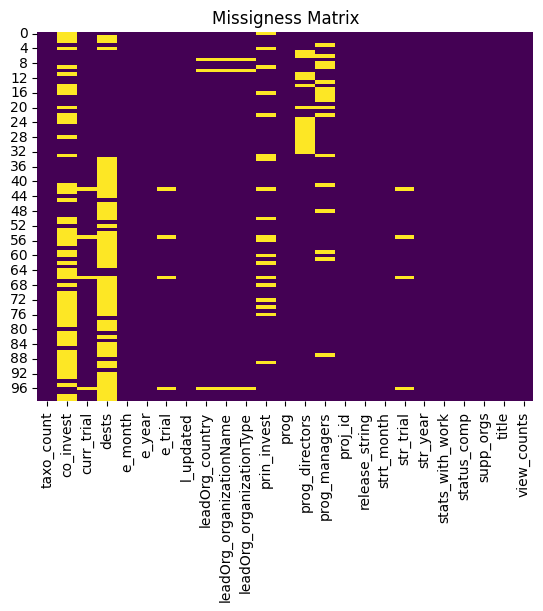

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df_projects.isnull(),cbar=False,cmap='viridis')
plt.title('Missigness Matrix')

Handling the Null values in the dataset using the Specific value replacement in place of NULL

In [ ]:
# Principle Investigators, Co-Investigators, Program Managers and Program directors
# There could be some project that don't have any person assigned to any of the role, therefore we will address missing values with 'Nobody'
value = 'Unknown'
df_projects['prin_invest'].fillna(value, inplace=True)
df_projects['co_invest'].fillna(value, inplace=True)
df_projects['prog_managers'].fillna(value, inplace=True)
df_projects['prog_directors'].fillna(value, inplace=True)

df_projects['dests'].fillna('Not Given', inplace=True)

# Addressing lead organisation (Country, OrgName, OrgType)
df_projects['leadOrg_country'].fillna('United States',inplace=True) # NASA is a part of United States so missing values will be USA
df_projects['leadOrg_organizationName'].fillna('National Aeronautics and Space Administration',inplace=True)
df_projects['leadOrg_organizationType'].fillna('Not Given',inplace=True) # NASA centered

df_projects['str_trial'].fillna(0,inplace=True)
df_projects['curr_trial'].fillna(0,inplace=True)
df_projects['e_trial'].fillna(0,inplace=True)

Sanity Check of data for NULL values

In [ ]:
df_projects.isnull().sum()

taxo_count                  0
co_invest                   0
curr_trial                  0
dests                       0
e_month                     0
e_year                      0
e_trial                     0
l_updated                   0
leadOrg_country             0
leadOrg_organizationName    0
leadOrg_organizationType    0
prin_invest                 0
prog                        0
prog_directors              0
prog_managers               0
proj_id                     0
release_string              0
strt_month                  0
str_trial                   0
str_year                    0
stats_with_work             0
status_comp                 0
supp_orgs                   0
title                       0
view_counts                 0
dtype: int64

Storing the Lead Organization Names in a set to get unique values

In [ ]:
set(df_projects['leadOrg_organizationName'])

{'Ames Research Center',
 'Armstrong Flight Research Center',
 'Blue Canyon Technologies, LLC',
 'Boston University',
 'California Institute of Technology',
 'Carnegie Mellon University',
 'Colorado School of Mines',
 'Eta Space',
 'Georgia Institute of Technology-Main Campus',
 'Giner, Inc.',
 'Glenn Research Center',
 'Goddard Space Flight Center',
 'Harvard University',
 'Johnson Space Center',
 'Kayhan Space Corp',
 'Langley Research Center',
 'Marshall Space Flight Center',
 'Massachusetts Institute of Technology',
 'Nanosonic, Inc.',
 'National Aeronautics and Space Administration',
 'New Mexico State University-Main Campus',
 'Paragon Space Development Corporation',
 'Purdue University-Main Campus',
 'Redwire Space, Inc.',
 'San Diego State University',
 'Soar Technology, Inc.',
 'Starfish Space, Inc.',
 'Stennis Space Center',
 'Texas A & M University-College Station',
 'The University of Kansas Center for Research, Inc.',
 'The University of Texas at Austin',
 'Turion Space Co

To generate and exporting dataset to '.csv' file format.

In [ ]:
df_projects.to_csv('NASA_Techport.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
df_csv = pd.read_csv('NASA_Techport.csv')
df_csv.head()

,taxo_count,co_invest,curr_trial,dests,e_month,e_year,e_trial,l_updated,leadOrg_country,leadOrg_organizationName,...,proj_id,release_string,strt_month,str_trial,str_year,stats_with_work,status_comp,supp_orgs,title,view_counts
0,0,Unknown,2.0,['Moon and Cislunar'],9,2024,6.0,2024-3-28,United States,Marshall Space Flight Center,...,116277,Released,5,2.0,2020,"('Alabama', 'United States')",Active,4,Plume Surface Interaction,498
1,0,Unknown,4.0,Not Given,7,2025,5.0,2024-3-26,United States,"Soar Technology, Inc.",...,154531,Released,7,4.0,2023,"('Michigan', 'United States')",Active,1,Virtual Explanation Reasoning Agent (VERA),42
2,0,Unknown,2.0,Not Given,9,2024,5.0,2024-3-26,United States,"Nanosonic, Inc.",...,154382,Released,8,2.0,2023,"('North Carolina', 'United States')",Active,2,Abrasion Resistant and Flame-Resistant Textile...,50
3,0,"['Zachary H Lewton', 'Jonathan A Morris', 'Mar...",6.0,"['Earth', 'Mars', 'Moon and Cislunar']",9,2024,9.0,2024-3-25,United States,Stennis Space Center,...,94884,Released,9,5.0,2016,"('California', 'United States')",Active,0,NASA Platform for Autonomous Systems,5843
4,4,Unknown,3.0,Not Given,9,2024,5.0,2024-3-25,United States,Marshall Space Flight Center,...,147003,Released,10,3.0,2021,"('Alabama', 'United States')",Active,36,RAMPT - Refractory Alloy Additive Manufacturin...,65


To generate and exporting dataset to '.xls' file format.

In [ ]:
df_projects.to_excel('NASA_Techport.xlsx',index=False)

In [ ]:
df_xls = pd.read_excel('NASA_Techport.xlsx')
df_xls.head()

,taxo_count,co_invest,curr_trial,dests,e_month,e_year,e_trial,l_updated,leadOrg_country,leadOrg_organizationName,...,proj_id,release_string,strt_month,str_trial,str_year,stats_with_work,status_comp,supp_orgs,title,view_counts
0,0,Unknown,2,['Moon and Cislunar'],9,2024,6,2024-3-28,United States,Marshall Space Flight Center,...,116277,Released,5,2,2020,"('Alabama', 'United States')",Active,4,Plume Surface Interaction,498
1,0,Unknown,4,Not Given,7,2025,5,2024-3-26,United States,"Soar Technology, Inc.",...,154531,Released,7,4,2023,"('Michigan', 'United States')",Active,1,Virtual Explanation Reasoning Agent (VERA),42
2,0,Unknown,2,Not Given,9,2024,5,2024-3-26,United States,"Nanosonic, Inc.",...,154382,Released,8,2,2023,"('North Carolina', 'United States')",Active,2,Abrasion Resistant and Flame-Resistant Textile...,50
3,0,"['Zachary H Lewton', 'Jonathan A Morris', 'Mar...",6,"['Earth', 'Mars', 'Moon and Cislunar']",9,2024,9,2024-3-25,United States,Stennis Space Center,...,94884,Released,9,5,2016,"('California', 'United States')",Active,0,NASA Platform for Autonomous Systems,5843
4,4,Unknown,3,Not Given,9,2024,5,2024-3-25,United States,Marshall Space Flight Center,...,147003,Released,10,3,2021,"('Alabama', 'United States')",Active,36,RAMPT - Refractory Alloy Additive Manufacturin...,65


In [ ]:
#-----------------------------------------------------------------------

In [ ]:
# need to ensure all the subset values are copied so, we need to have deep=True
Nasa_Data = df_projects.copy(deep=True)

In [ ]:
Nasa_Data.dtypes

taxo_count                    int64
co_invest                    object
curr_trial                  float64
dests                        object
e_month                       int64
e_year                        int64
e_trial                     float64
l_updated                    object
leadOrg_country              object
leadOrg_organizationName     object
leadOrg_organizationType     object
prin_invest                  object
prog                           bool
prog_directors               object
prog_managers                object
proj_id                       int64
release_string               object
strt_month                    int64
str_trial                   float64
str_year                      int64
stats_with_work              object
status_comp                  object
supp_orgs                     int64
title                        object
view_counts                   int64
dtype: object

# Program Directors Distribution plot

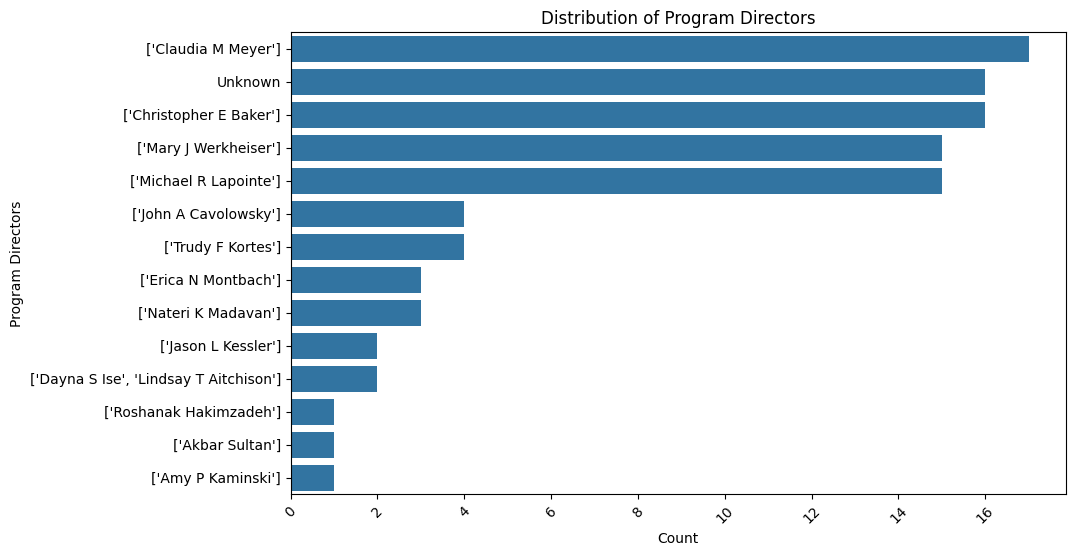

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = Nasa_Data

plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(data=df, y='prog_directors', order=df['prog_directors'].value_counts().index)

# Rotate the labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Distribution of Program Directors')
plt.xlabel('Count')
plt.ylabel('Program Directors')

# Show the plot
plt.show()

# Analysis of Program Director Contributions
NASA’s Technology Portfolio Management System (TechPort) serves as a comprehensive resource for locating detailed information about NASA-funded projects. We have analyzed the 100 samples from the NASA TechPort dataset and created a bar chart to display the distribution of program directors’ contributions to the projects. Contrary to the initial text, it is Mary J Werkheiser who leads with contributions to over 18 projects. Claudia M Meyer follows with contributions to around 17 projects, Michael R Lapointe with approximately 15, and Trudy F Kortes with close to 8 contributions. These four program directors are significant contributors as they contributed for over 50% of the overall projects.

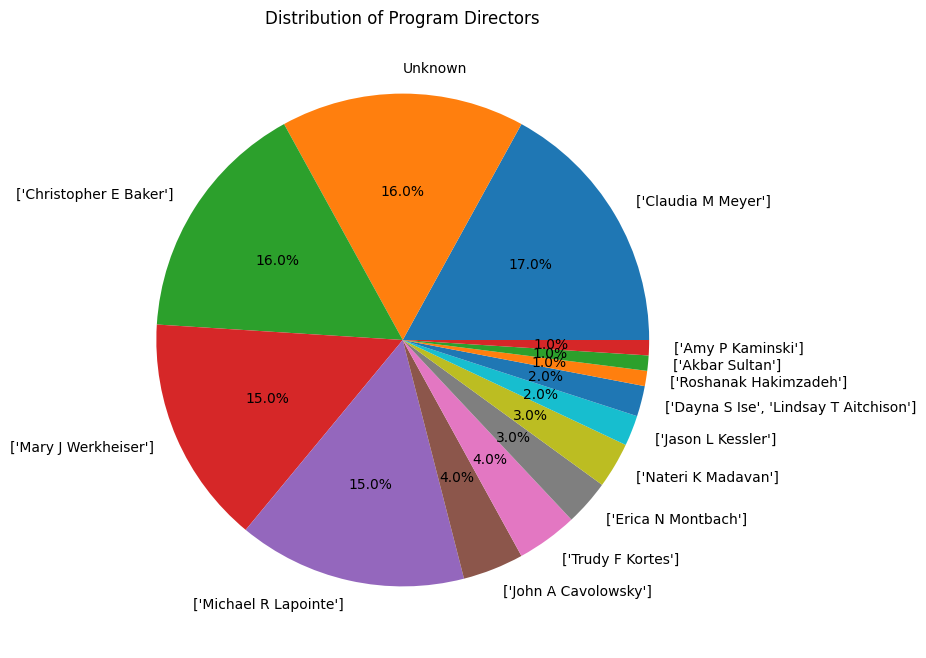

In [ ]:
plt.figure(figsize=(8, 8))  # Set the figure size

# Count the occurrences of each program director
director_counts = df['prog_directors'].value_counts()

# Plotting a pie chart
plt.pie(director_counts, labels=director_counts.index, autopct='%1.1f%%')

# Set plot title
plt.title('Distribution of Program Directors')

# Show the plot
plt.show()

# Analysis of Program Director Contributions
NASA’s Technology Portfolio Management System (TechPort) serves as a comprehensive resource for locating detailed information about NASA-funded projects. We have analyzed the 100 samples from the NASA TechPort dataset and created a bar chart to display the distribution of program directors’ contributions to the projects. Contrary to the initial text, it is Mary J Werkheiser who leads with contributions to over 18 projects. Claudia M Meyer follows with contributions to around 17 projects, Michael R Lapointe with approximately 15, and Trudy F Kortes with close to 8 contributions. These four program directors are significant contributors as they contributed for over 50% of the overall projects.

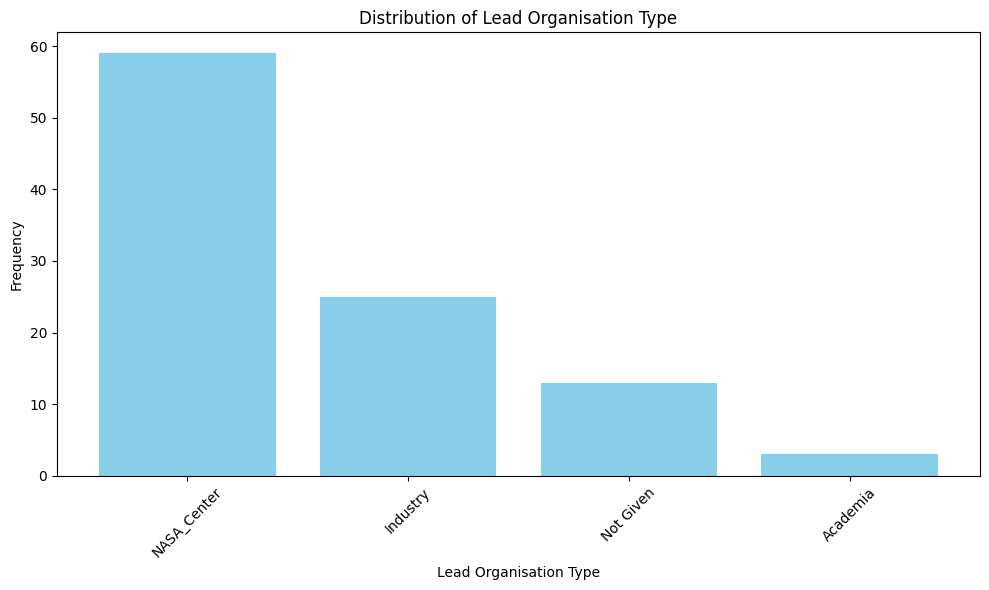

In [ ]:
dataset1 = df_projects['leadOrg_organizationType']

x = dataset1.unique().tolist()
y = dataset1.value_counts().tolist()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Lead Organisation Type')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Organisation Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of Lead Organisation Type
This chart sheds light on the types of organizations spearheading NASA projects, using data called from the NASA TechPort project information system. By analyzing the 100 projects, it becomes clear that NASA Centers themselves take the lead in a significant portion of these endeavors. Following closely behind are industry giants, showcasing a strong collaborative effort between government and private enterprise. While academic institutions are also present, their representation appears to be  smaller based on this sample.

It's important to remember that this chart offers a glimpse into a specific subset of NASA projects.  The broader picture within the entire TechPort dataset might reveal a different distribution of lead organization types.

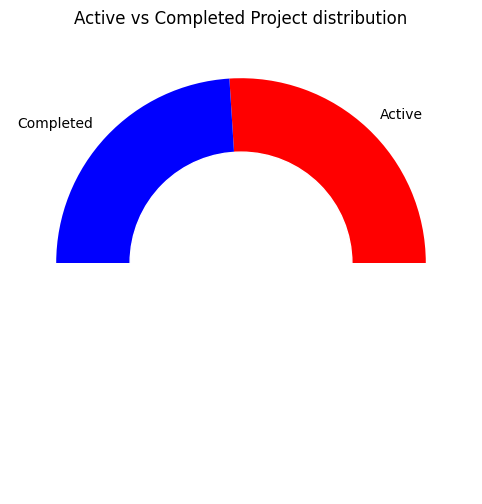

In [ ]:
status_df = Nasa_Data['status_comp']
sts_label = status_df.unique().tolist()
sts_value = status_df.value_counts().tolist()

# append data and assign color
sts_label.append("")
sts_value.append(sum(sts_value))  # 50% blank
colors = ['red', 'blue', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(sts_value, labels=sts_label, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title('Active vs Completed Project distribution')
fig.show()

# Donut chart distribution of project status
It shows a circular chart divided into two sections. The largest section, colored red, is labeled "Active". The other section, colored blue, is labeled "Completed".

This suggests that there are more active projects than completed projects. However, it is difficult to say for certain what proportion of projects are active vs completed based on the image alone. The blue section representing completed projects is smaller than the red section representing active projects.